# TLDR;

## Playing around with GraphViz to make it present groups in a particular order
## Playing around with NetworkX - has:
### a bunch of abstract graph algorithms
### and some graph drawing capabilities as well

# Start with a List of Table Dependencies

## Each paragraph is a table followed by other tables that feed into it.

### E.G/ words, table 1 depends on tables 2, 3, 4, and 5 in the first chunk
```
team.table_1
play.table_2
reporting.table_3
public.table_4
reporting.table_5
```

In [39]:
tables = """

team.table_1
play.table_2
reporting.table_3
public.table_4
reporting.table_5


team.table_6
play.table_2
reporting.table_3
public.table_4
reporting.table_5


team.table_7
team.table_8
team.table_9
team.table_10
team.table_11

team.table_12
other.table_13


team.table_11
team.table_12


team.table_10
other.table_13


team.table_14
play.table_2
public.table_4
team.table_7

team.table_15
play.table_2
public.table_4


team.table_16
team.table_15
other.table_13

team.table_17
team.table_1
team.table_16


team.table_18
team.table_15
other.table_13

team.table_19
team.table_15
team.table_18


team.table_20
team.table_18
team.table_19


team.table_21
team.table_20
team.table_19

team.table_22
team.table_1
reporting.table_23
public.table_24

team.table_25
play.table_26
public.table_4


team.table_27
team.table_25
public.table_24


team.table_28
public.table_29


team.table_30
team.table_31
team.table_6
reporting.table_32


team.table_33
play.table_2
team.table_6
team.table_28
team.table_1
reporting.table_5
team.table_30


team.table_31
public.table_29
public.table_34
team.table_30

team.table_35
team.table_22
team.table_33


team.table_36
play.table_26
team.table_27
team.table_37


team.table_38
team.table_36


team.table_39
play.table_26
reporting.table_5
team.table_40
public.table_41
public.table_42
public.table_43
public.table_44


team.table_45
play.table_2
public.table_4
public.table_41


team.table_46
play.table_26
public.table_4


team.table_47
play.table_2
team.table_39
team.table_45
team.table_46


team.table_48
team.table_38
team.table_47


team.table_49
other.table_50


team.table_51
play.table_26
reporting.table_5
team.table_49


team.table_52
play.table_2
reporting.table_5
reporting.table_3


team.table_53
team.table_52


team.table_54
team.table_40
reporting.table_5
public.table_42
public.table_43
public.table_44
public.table_24


team.table_55
team.table_54


team.table_56
play.table_2
team.table_14
team.table_17
team.table_33
team.table_35
team.table_38
team.table_47
team.table_48
team.table_51
team.table_53
team.table_55


team.table_57
play.table_2
team.table_14
team.table_17
team.table_21
team.table_33
team.table_35
team.table_38
team.table_47
team.table_48
team.table_51
team.table_53
team.table_55
"""

In [40]:
# Something I used to obfuscate with
#
# lines = [line for line in tables.split("\n")]

# schema_renamer = {
#     'lms_public': 'public',
#     'lms_reporting': 'reporting',
#     'keyvals': 'other',
# }

# for line in lines:
#     parts = line.split(".")

#     if len(parts) == 1:
#         print(line)
#     else:
#         if parts[0] in schema_renamer:
#             parts[0] = schema_renamer[parts[0]]
#         parts[1] = f'table_{labels[line]}'
#         print(".".join(parts))

# Build the Graph

In [41]:
def build_graph(tables_str):
    graph = {}

    is_source = True
    for line in tables_str.split("\n"):
        token = line.strip()
        if len(token) == 0:
            is_source = True
        else:
            if is_source:
                source = token
                if source in graph:
                    print(f"UH OHH. OVERWRITING {source} -> {graph[source]}")
                graph[source] = []
                is_source = False
            else:
                graph[source].append(token)
                
    return graph

In [42]:
import json


graph = build_graph(tables)
print(json.dumps(graph, indent=4))

{
    "team.table_1": [
        "play.table_2",
        "reporting.table_3",
        "public.table_4",
        "reporting.table_5"
    ],
    "team.table_6": [
        "play.table_2",
        "reporting.table_3",
        "public.table_4",
        "reporting.table_5"
    ],
    "team.table_7": [
        "team.table_8",
        "team.table_9",
        "team.table_10",
        "team.table_11"
    ],
    "team.table_12": [
        "other.table_13"
    ],
    "team.table_11": [
        "team.table_12"
    ],
    "team.table_10": [
        "other.table_13"
    ],
    "team.table_14": [
        "play.table_2",
        "public.table_4",
        "team.table_7"
    ],
    "team.table_15": [
        "play.table_2",
        "public.table_4"
    ],
    "team.table_16": [
        "team.table_15",
        "other.table_13"
    ],
    "team.table_17": [
        "team.table_1",
        "team.table_16"
    ],
    "team.table_18": [
        "team.table_15",
        "other.table_13"
    ],
    "team.table_

## Labels, in case need to have numbers instead of names to save space

In [43]:
def get_labels_edges(graph_dict):
    i = 1
    labels = {}
    edges = []
    for target, sources in graph_dict.items():
        if target not in labels:
            labels[target] = i
            i += 1
        for source in sources:
            if source not in labels:
                labels[source] = i
                i += 1
            edges.append((labels[source], labels[target]))

    reverse = {v:k for k,v in labels.items()}
    return labels, reverse, edges

In [44]:
labels, reverse, edges = get_labels_edges(graph)

reverse

{1: 'team.table_1',
 2: 'play.table_2',
 3: 'reporting.table_3',
 4: 'public.table_4',
 5: 'reporting.table_5',
 6: 'team.table_6',
 7: 'team.table_7',
 8: 'team.table_8',
 9: 'team.table_9',
 10: 'team.table_10',
 11: 'team.table_11',
 12: 'team.table_12',
 13: 'other.table_13',
 14: 'team.table_14',
 15: 'team.table_15',
 16: 'team.table_16',
 17: 'team.table_17',
 18: 'team.table_18',
 19: 'team.table_19',
 20: 'team.table_20',
 21: 'team.table_21',
 22: 'team.table_22',
 23: 'reporting.table_23',
 24: 'public.table_24',
 25: 'team.table_25',
 26: 'play.table_26',
 27: 'team.table_27',
 28: 'team.table_28',
 29: 'public.table_29',
 30: 'team.table_30',
 31: 'team.table_31',
 32: 'reporting.table_32',
 33: 'team.table_33',
 34: 'public.table_34',
 35: 'team.table_35',
 36: 'team.table_36',
 37: 'team.table_37',
 38: 'team.table_38',
 39: 'team.table_39',
 40: 'team.table_40',
 41: 'public.table_41',
 42: 'public.table_42',
 43: 'public.table_43',
 44: 'public.table_44',
 45: 'team.ta

## Shells (aka "rank") - based on appearance in SQL Query

In [45]:
def get_naive_groupings(graph_dict):
    shells = []
    shell_next = []
    already_seen = set()
    for target, sources in graph_dict.items():
        shell_curr = shell_next
        for source in sources:
            s = labels[source]
            if not s in already_seen:
                shell_curr.append(s)
            already_seen.add(s)

        if len(shell_curr) > 0:
            shells.append(shell_curr)

        shell_next = []
        t = labels[target]
        if not t in already_seen:
            shell_next.append(t)
        already_seen.add(t)

    if len(shell_next) > 0:
        shells.append(shell_next)

    return shells

In [46]:
shells = get_naive_groupings(graph)

shells

[[2, 3, 4, 5],
 [1],
 [6, 8, 9, 10, 11],
 [7, 13],
 [12],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21, 23, 24],
 [22, 26],
 [25],
 [27, 29],
 [28, 31, 32],
 [30],
 [33, 34],
 [35, 37],
 [36],
 [38, 40, 41, 42, 43, 44],
 [39],
 [45],
 [46],
 [47],
 [48, 50],
 [49],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57]]

## DB Schemas - with colors

In [47]:
schemas = set()
for v in reverse.values():
    schemas.add(v.split(".")[0])
    
schemas

{'other', 'play', 'public', 'reporting', 'team'}

### Define Colors based on Schema

In [48]:
schema_colors = {
 'play': 'red',
 'team': 'yellow',
 'other': 'green',
 'public': 'grey',
 'reporting': 'blue',
}
def get_color(node_number):
    return schema_colors[reverse[node_number].split(".")[0]]

# Legend

In [49]:
reverse

{1: 'team.table_1',
 2: 'play.table_2',
 3: 'reporting.table_3',
 4: 'public.table_4',
 5: 'reporting.table_5',
 6: 'team.table_6',
 7: 'team.table_7',
 8: 'team.table_8',
 9: 'team.table_9',
 10: 'team.table_10',
 11: 'team.table_11',
 12: 'team.table_12',
 13: 'other.table_13',
 14: 'team.table_14',
 15: 'team.table_15',
 16: 'team.table_16',
 17: 'team.table_17',
 18: 'team.table_18',
 19: 'team.table_19',
 20: 'team.table_20',
 21: 'team.table_21',
 22: 'team.table_22',
 23: 'reporting.table_23',
 24: 'public.table_24',
 25: 'team.table_25',
 26: 'play.table_26',
 27: 'team.table_27',
 28: 'team.table_28',
 29: 'public.table_29',
 30: 'team.table_30',
 31: 'team.table_31',
 32: 'reporting.table_32',
 33: 'team.table_33',
 34: 'public.table_34',
 35: 'team.table_35',
 36: 'team.table_36',
 37: 'team.table_37',
 38: 'team.table_38',
 39: 'team.table_39',
 40: 'team.table_40',
 41: 'public.table_41',
 42: 'public.table_42',
 43: 'public.table_43',
 44: 'public.table_44',
 45: 'team.ta

# GraphViz Stab 1: Modest Success

In [50]:
from graphviz import Digraph

In [51]:
def public_attributes(obj):
    return {name: obj.__getattribute__(name) for name in dir(obj) if not name.startswith('_')}

# public_attributes(ecm_dependency_graph)

#### Resized graph thanks to [this StackOverflow](https://stackoverflow.com/questions/3428448/reducing-the-size-as-in-area-of-the-graph-generated-by-graphviz)

In [52]:
def dependency_graph(graph_dict, reverse_dict, rank_groups, 
                     label_with_tables=False, 
                     scaler=1, 
                     fixed_size=False,
                     with_node_constraints=True,
                     top_to_bottom=True,
                     escalating_ranks=False,
                    ):
    
    graph_attributes = {
        'nodesep': f'{0.05 * scaler}',
        'ranksep': '0.75', #f'{0.05 * scaler}',
        'rankdir': 'TB' if top_to_bottom else 'LR',
    }
    if fixed_size:
        graph_attributes['size'] = "20,8" if label_with_tables else "8,11"

    edge_attribute = {
        'weight': f'{1.2 * scaler}',
    }

    node_attributes = {
        'fontsize': '11',
        'shape': 'box' if label_with_tables else 'circle',
    }

    ecm_dependency_graph = Digraph("ECM Table Dependency", 
                                   graph_attr=graph_attributes,
                                   edge_attr=edge_attribute,
                                   node_attr=node_attributes,
                              )

    for target, sources in graph_dict.items():
        for source in sources:
            ecm_dependency_graph.edge(source, target, constraint=('true' if with_node_constraints else 'false'))

    for level, group in enumerate(rank_groups):        
        with ecm_dependency_graph.subgraph(name=f'group_{level}') as sg:
            rank = 'same' + (f'_{level:>08d}' if escalating_ranks else '')
            sg.graph_attr.update(rank=rank)
            for node in group:
                label = None if label_with_tables else str(node)
                sg.node(reverse_dict[node], style='filled', color=get_color(node), label=label)


    return ecm_dependency_graph

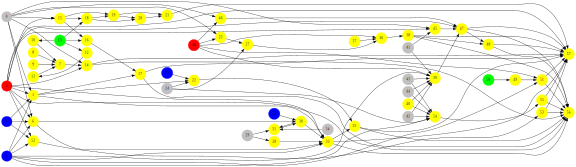

In [54]:
dependency_graph(graph, reverse, shells, fixed_size=True, scaler=1.5, escalating_ranks=False, top_to_bottom=False)

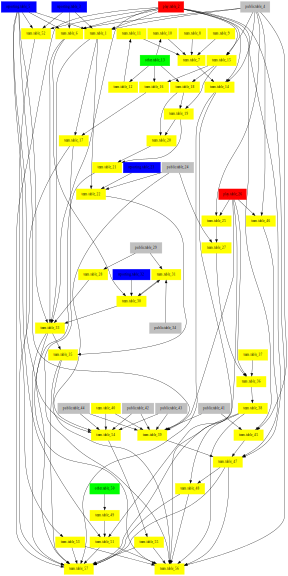

In [55]:
dependency_graph(graph, reverse, shells, True, fixed_size=True, scaler=1.5, top_to_bottom=True)

# NetworkX - useful for topologically sorting and other graph algos

In [56]:
import networkx as nx 
G = nx.DiGraph() 
G.add_edges_from(edges)

In [57]:
# G.is_directed_acyclic_graph()
nx.is_directed_acyclic_graph(G)

False

In [58]:
nx.find_cycle(G)

[(30, 31), (31, 30)]

## Damn, that means we can't do a topological sort

In [59]:
list(nx.topological_sort(G))

NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

### So let's break that cycle

In [61]:
relevant = {k:graph[k] for k in [reverse[30], reverse[31]]}
relevant

{'team.table_30': ['team.table_31', 'team.table_6', 'reporting.table_32'],
 'team.table_31': ['public.table_29', 'public.table_34', 'team.table_30']}

#### Looking at the SQL... (not included)
...remove element in the graph `'team.table_31': ['team.table_30']`

In [62]:
del graph[reverse[31]][2]

## Rebuild the graph and ancillary data

In [64]:
labels, reverse, edges = get_labels_edges(graph)

G = nx.DiGraph() 
G.add_edges_from(edges)

In [65]:
nx.is_directed_acyclic_graph(G)

True

In [66]:
top_sorted = list(nx.topological_sort(G))
top_sorted

[50,
 49,
 44,
 43,
 42,
 41,
 40,
 37,
 34,
 32,
 29,
 31,
 28,
 26,
 24,
 23,
 13,
 10,
 12,
 11,
 9,
 8,
 7,
 5,
 54,
 55,
 51,
 39,
 4,
 46,
 25,
 27,
 36,
 38,
 3,
 2,
 52,
 53,
 45,
 47,
 48,
 15,
 18,
 19,
 20,
 21,
 16,
 14,
 6,
 30,
 1,
 33,
 22,
 35,
 17,
 57,
 56]

In [70]:
def ranked_topological_sort(nx_graph):
    """
    returns a list of lists representing a grouping of a topological sorting into equivalent
    orderings
    
    NOT VERY EFFICIENT
    """
    top_groupings = []
    g = nx_graph.copy()
    while len(g) > 0:
        sources = get_all_sources(g)
        top_groupings.append(sources)
        g.remove_nodes_from(sources)
        
    return top_groupings

def get_all_sources(nx_graph):
    return [n for n in nx_graph if nx_graph.in_degree(n) == 0]

In [71]:
len(G)

57

In [72]:
G.in_degree(47)

4

In [73]:
get_all_sources(G)

[2, 3, 4, 5, 8, 9, 13, 23, 24, 26, 29, 32, 34, 37, 40, 41, 42, 43, 44, 50]

In [74]:
topo_ranks = ranked_topological_sort(G)

topo_ranks

[[2, 3, 4, 5, 8, 9, 13, 23, 24, 26, 29, 32, 34, 37, 40, 41, 42, 43, 44, 50],
 [1, 6, 10, 12, 15, 25, 28, 31, 39, 45, 46, 49, 52, 54],
 [11, 16, 18, 22, 27, 30, 47, 51, 53, 55],
 [7, 17, 19, 33, 36],
 [14, 20, 35, 38],
 [21, 48],
 [56, 57]]

## Break the first group by color

* red, yellow, green, grey, blue

In [78]:
first_groups = {}
for source in topo_ranks[0]:
    color = get_color(source)

    if color not in first_groups:
        first_groups[color] = []
    first_groups[color].append(source)

first_groups

rankings = []
rankings.append(first_groups['red'])
rankings.append(first_groups['yellow'])
rankings.append(first_groups['green'])
rankings.append(first_groups['grey'])
rankings.append(first_groups['blue'])
rankings.reverse()
for i in range(1, len(topo_ranks)):
    rankings.append(topo_ranks[i])
    
# list(reversed(rankings)), rankings

digraph "ECM Table Dependency" {
	graph [nodesep=0.2 rankdir=LR ranksep=0.75 size="8,11"]
	node [fontsize=11 shape=circle]
	edge [weight=4.8]
	"play.table_2" -> "team.table_1" [constraint=true]
	"reporting.table_3" -> "team.table_1" [constraint=true]
	"public.table_4" -> "team.table_1" [constraint=true]
	"reporting.table_5" -> "team.table_1" [constraint=true]
	"play.table_2" -> "team.table_6" [constraint=true]
	"reporting.table_3" -> "team.table_6" [constraint=true]
	"public.table_4" -> "team.table_6" [constraint=true]
	"reporting.table_5" -> "team.table_6" [constraint=true]
	"team.table_8" -> "team.table_7" [constraint=true]
	"team.table_9" -> "team.table_7" [constraint=true]
	"team.table_10" -> "team.table_7" [constraint=true]
	"team.table_11" -> "team.table_7" [constraint=true]
	"other.table_13" -> "team.table_12" [constraint=true]
	"team.table_12" -> "team.table_11" [constraint=true]
	"other.table_13" -> "team.table_10" [constraint=true]
	"play.table_2" -> "team.table_14" [constrai

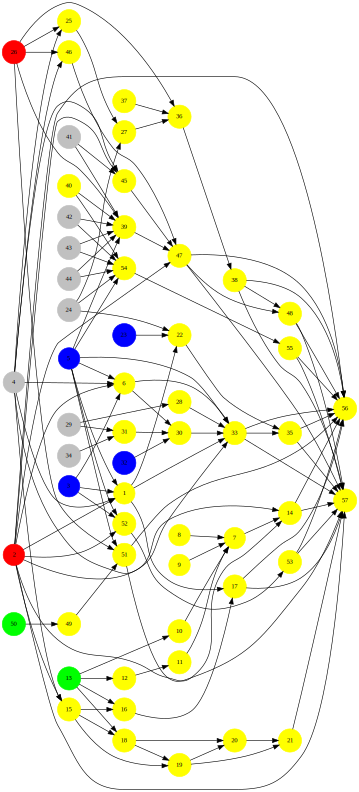

In [79]:
dg = dependency_graph(graph, reverse, rankings, 
                      fixed_size=True, 
                      scaler=4, 
                      with_node_constraints=True,
                      escalating_ranks=True,
                      top_to_bottom=False,
                     )

print(dg.source)
dg

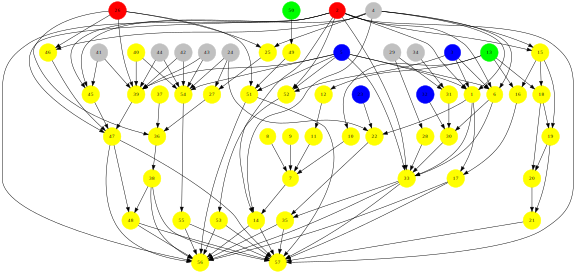

In [80]:
dependency_graph(graph, reverse, rankings, 
                      fixed_size=True, 
                      scaler=4, 
                      with_node_constraints=True,
                      escalating_ranks=True
                     )

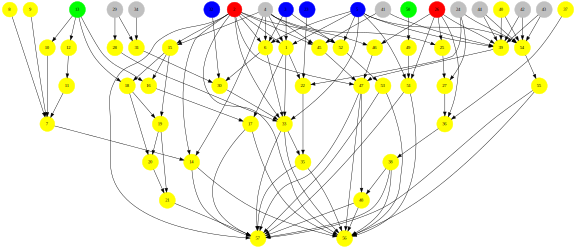

In [81]:
dependency_graph(graph, reverse, rankings, 
                      fixed_size=True, 
                      scaler=4, 
                      with_node_constraints=True,
                      escalating_ranks=False
                     )

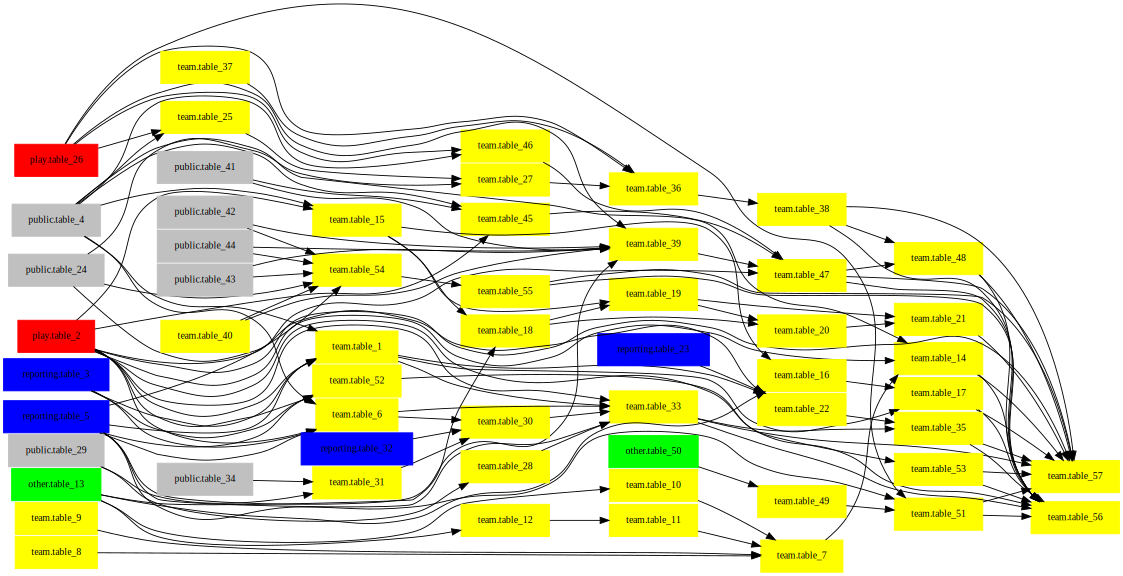

In [82]:
dependency_graph(graph, reverse, rankings, True, fixed_size=True, scaler=0.5, escalating_ranks=True, top_to_bottom=False)

# Appendix 1: NetworkX - pretty nifty, but not quite right for drawing

In [83]:
color_map = [get_color(n) for n in G]

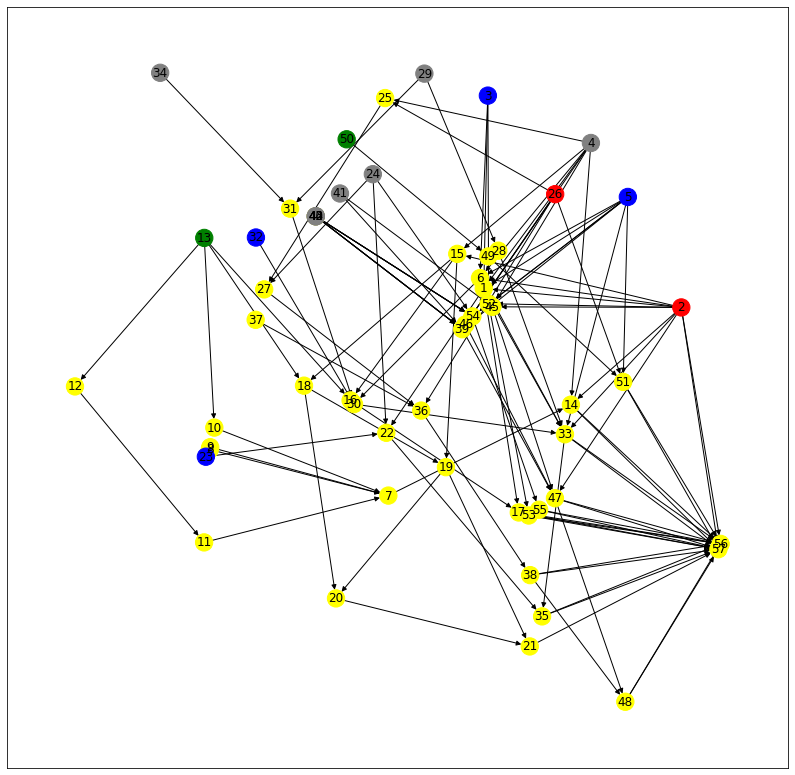

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize =(14, 14)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.kamada_kawai_layout(G))

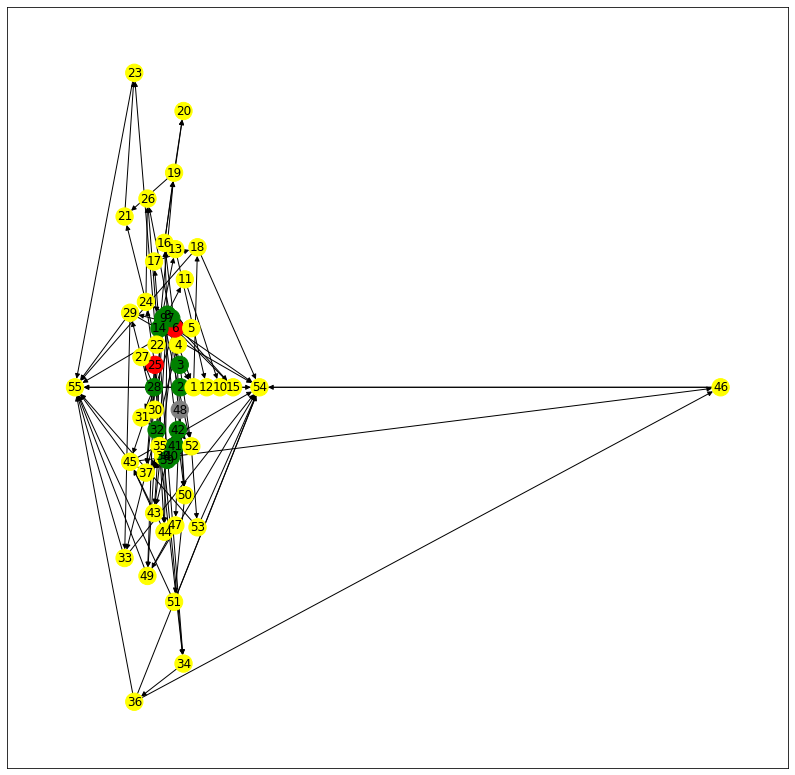

In [113]:
plt.figure(figsize =(14, 14)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.shell_layout(G, topo_ranks))

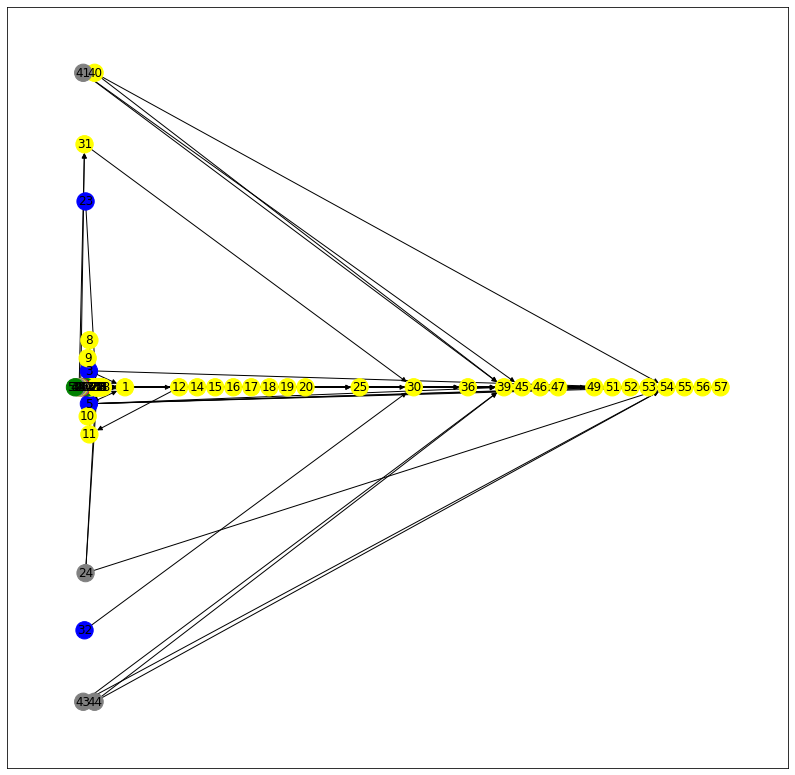

In [85]:
plt.figure(figsize =(14, 14)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.shell_layout(G, shells)) 

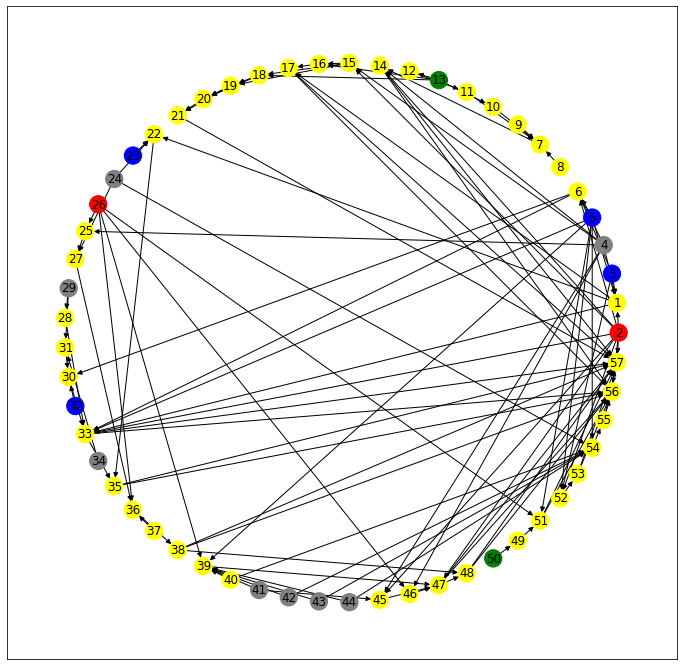

In [86]:
plt.figure(figsize =(12, 12)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.shell_layout(G)) 

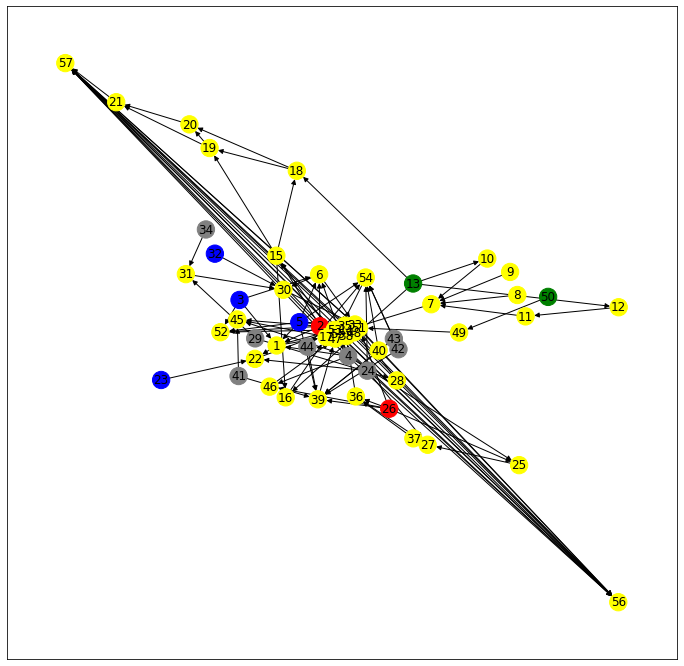

In [87]:
plt.figure(figsize =(12, 12)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.spring_layout(G)) 

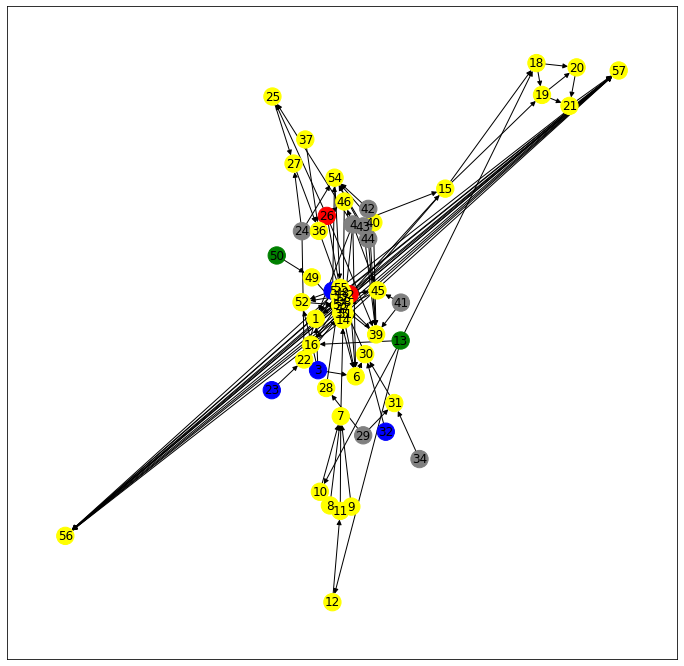

In [88]:
plt.figure(figsize =(12, 12)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.fruchterman_reingold_layout(G))

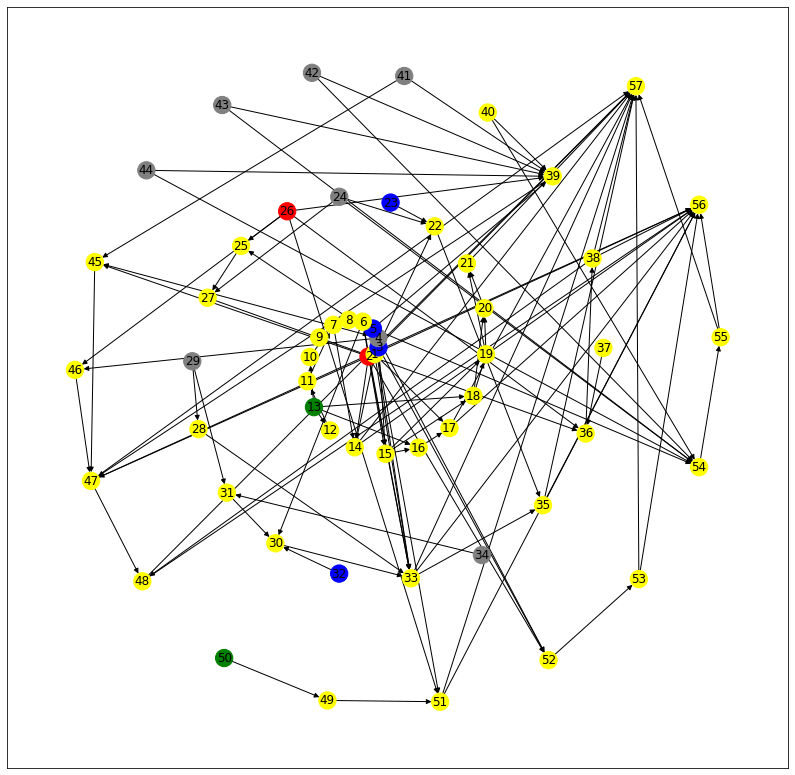

In [89]:
plt.figure(figsize =(14, 14)) 
nx.draw_networkx(G, with_label=True, node_color=color_map, pos=nx.spiral_layout(G))